In [1]:
# Purpose: Compare Features Selected by LASSO, MI according to Jaccard Coefficient and Correlation of Principal Components
# Inputs: LASSO-selected vars, aggregated accross outcome, for various R^2 cutoffs, MI-selected vars for various K
# Outputs: Heatmap showing Jaccard Coefficient for diff combinations of LASSO/MI files, and Heatmap of Correlation of 1st P.C.
# Machine: 4-core PC, ~2 hrs

In [2]:
# Packages Used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import astropy.stats as AS
from scipy.stats.stats import pearsonr 
from os import listdir
from sklearn.decomposition import PCA
import seaborn as sns

%matplotlib inline



In [3]:
# Random Seed
np.random.seed(0)

In [4]:
LASSO_files = listdir('../output/LASSO_ALL/')
MI_files = ['data_univariate_feature_selection_5.csv','data_univariate_feature_selection_15.csv','data_univariate_feature_selection_50.csv','data_univariate_feature_selection_100.csv','data_univariate_feature_selection_200.csv','data_univariate_feature_selection_300.csv','data_univariate_feature_selection_500.csv','data_univariate_feature_selection_700.csv','data_univariate_feature_selection_1000.csv','data_univariate_feature_selection_1500.csv','data_univariate_feature_selection_2000.csv','data_univariate_feature_selection_3000.csv','data_univariate_feature_selection_4000.csv']

In [5]:
LASSO_files = np.sort(LASSO_files)


In [6]:
perc_similar = np.zeros((len(LASSO_files),len(MI_files)))
PC1_corr = np.zeros((len(LASSO_files),len(MI_files)))
L_names = []
MI_names = []

for i,L_file in enumerate(LASSO_files):
    temp_L = pd.read_csv(('../output/LASSO_ALL/'+L_file), index_col = 0)
    L_names.append(np.shape(temp_L.columns.values)[0])
    L_PC = PCA(n_components=2).fit_transform(temp_L)

    for j,MI_file in enumerate(MI_files):
        temp_M = pd.read_csv(('../output/MI/'+MI_file), index_col = 0)
        MI_names.append(np.shape(temp_M.columns.values)[0])
        MI_PC = PCA(n_components=2).fit_transform(temp_M)

        PC1_corr[i,j] = pearsonr(L_PC[:,0],MI_PC[:,0])[0]
        
        total_num = temp_L.columns.values.tolist()
        total_num.extend(temp_M.columns.values.tolist())
        
        perc_similar[i,j]= sum(np.in1d(temp_L.columns.values,temp_M.columns.values))/len(total_num)
        
        

In [7]:
        total_num = temp_L.columns.values.tolist()
        total_num.extend(temp_M.columns.values.tolist())
        
        perc_similar[i,j]= sum(np.in1d(temp_L.columns.values,temp_M.columns.values))/len(total_num)

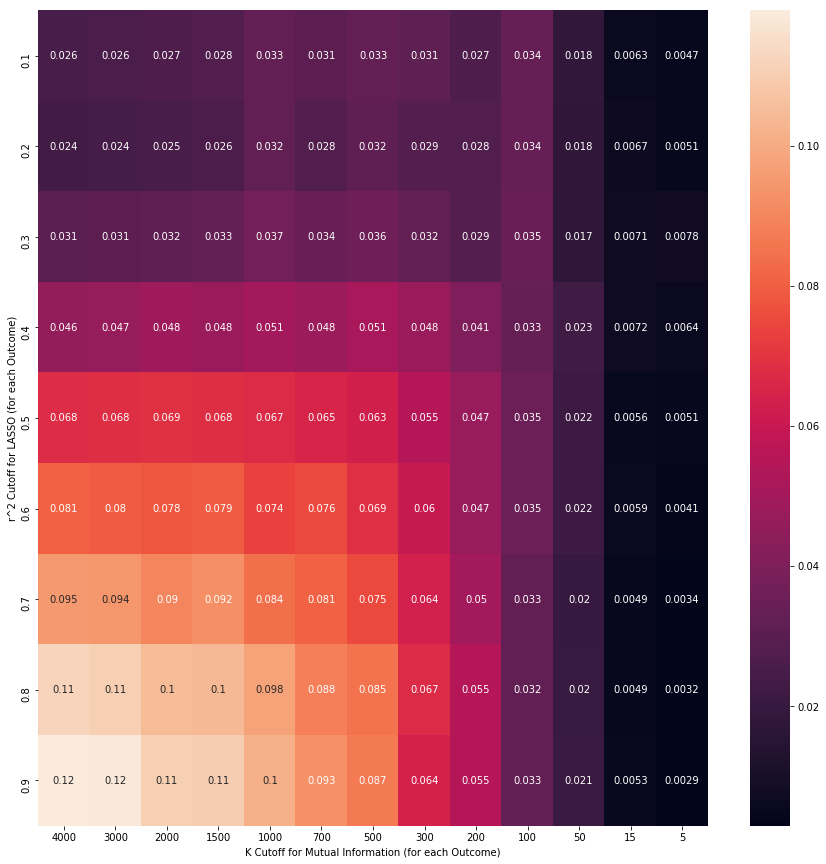

In [8]:
data_named = pd.DataFrame(perc_similar,index = L_names, columns = np.unique(MI_names))
columns = data_named.columns.tolist()
columns = columns[::-1]
data_named = data_named[columns]

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), sharex=True)
sns.heatmap(data_named, annot = True)
ax.set_xlabel('K Cutoff for Mutual Information (for each Outcome)')
ax.set_ylabel('r^2 Cutoff for LASSO (for each Outcome)')
ax.set_xticklabels(["4000","3000","2000","1500","1000","700","500","300","200","100","50","15","5"])
ax.set_yticklabels([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.savefig('../output/fig/feature_heatmap.png')


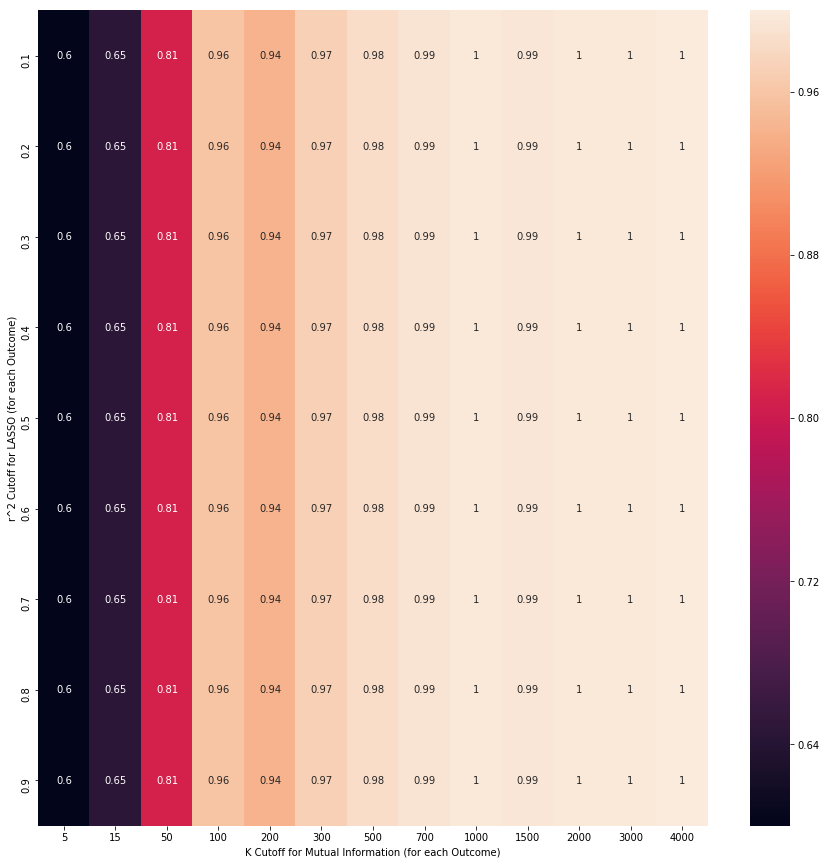

In [9]:
L_names = [str(str(np.round(i,1))) for i in np.linspace(0.1,0.9,9)]
MI_names = [str(str(i)) for i in [5,15,50,100,200,300,500,700,1000,1500,2000,3000,4000]]
data_PC = pd.DataFrame(PC1_corr,index = L_names, columns = MI_names)
columns = data_named.columns.tolist()
columns = columns[::-1]
data_named = data_named[columns]

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), sharex=True)
sns.heatmap(data_PC, annot = True)
ax.set_xlabel('K Cutoff for Mutual Information (for each Outcome)')
ax.set_ylabel('r^2 Cutoff for LASSO (for each Outcome)')
plt.savefig('../output/fig/PC1_heatmap.png')